In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Cardetails.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.shape

(8128, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
data = df.copy()

In [8]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
data['seats'] = imputer.fit_transform(data[['seats']])

In [9]:
data.apply(pd.isnull).sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats              0
dtype: int64

In [10]:
data['mileage'] = data['mileage'].str.replace(' kmpl', '')

In [11]:
data['mileage'] = data['mileage'].str.replace(' km/kg', '')

In [12]:
data['mileage'] = pd.to_numeric(data['mileage'])

In [13]:
data['engine'] = data['engine'].str.replace(' CC', '')

In [14]:
data['engine'] = pd.to_numeric(data['engine'])

In [15]:
data['max_power'] = data['max_power'].str.replace(' bhp', '')

In [16]:
data['max_power'] = pd.to_numeric(data['max_power'])

In [17]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats              0
dtype: int64

In [18]:
cols1 = ['mileage', 'engine', 'max_power']

In [19]:
data[cols1] = imputer.fit_transform(data[cols1])

In [20]:
data.apply(pd.isnull).sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           222
seats              0
dtype: int64

In [21]:
data.drop(columns = ['torque'], axis = 1, inplace = True)

In [22]:
def text_splitting(text):
    return text.split()[0]

In [23]:
data['brand'] = data['name'].apply(text_splitting)

In [24]:
data.drop(columns = ['name'], axis = 1, inplace = True)

In [25]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


In [26]:
for column in data.columns:
    print(f'{column} : {data[column].nunique()}')
    print('---------------------------------------------')

year : 29
---------------------------------------------
selling_price : 677
---------------------------------------------
km_driven : 921
---------------------------------------------
fuel : 4
---------------------------------------------
seller_type : 3
---------------------------------------------
transmission : 2
---------------------------------------------
owner : 5
---------------------------------------------
mileage : 381
---------------------------------------------
engine : 121
---------------------------------------------
max_power : 319
---------------------------------------------
seats : 9
---------------------------------------------
brand : 32
---------------------------------------------


In [27]:
data['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

In [28]:
b = ['Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia', 'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot']

In [29]:
for item in b:
    data = data[data['brand'] != item]

In [30]:
data['brand'].value_counts()

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Name: count, dtype: int64

In [31]:
data.shape

(8080, 12)

In [32]:
numerical_columns, categorical_columns = [], []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [33]:
categorical_columns

['fuel', 'seller_type', 'transmission', 'owner', 'brand']

In [34]:
numerical_columns

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats']

In [35]:
for column in categorical_columns:
    print(f'{column} : {data[column].value_counts()}')
    print('---------------------------------------------')

fuel : fuel
Diesel    4361
Petrol    3624
CNG         57
LPG         38
Name: count, dtype: int64
---------------------------------------------
seller_type : seller_type
Individual          6733
Dealer              1111
Trustmark Dealer     236
Name: count, dtype: int64
---------------------------------------------
transmission : transmission
Manual       7046
Automatic    1034
Name: count, dtype: int64
---------------------------------------------
owner : owner
First Owner             5259
Second Owner            2093
Third Owner              549
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64
---------------------------------------------
brand : brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar          

In [36]:
data = data[data['owner'] != 'Test Drive Car']

In [37]:
data.shape

(8075, 12)

In [38]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8075.000000,8.075000e+03,8.075000e+03,8075.000000,8075.000000,8075.000000,8075.000000
mean,2013.811393,6.322234e+05,6.979504e+04,19.445798,1449.352074,91.074086,5.403096
std,4.006586,7.944153e+05,5.648244e+04,3.968809,496.049153,35.209917,0.948182
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.717150e+04,22.300000,1582.000000,100.600000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [39]:
data[data['max_power'] == 0].shape

(6, 12)

In [40]:
data = data[data['max_power'] != 0]

In [41]:
data.shape

(8069, 12)

In [42]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8069.000000,8.069000e+03,8.069000e+03,8069.000000,8069.000000,8069.000000,8069.000000
mean,2013.811749,6.324373e+05,6.979520e+04,19.445907,1449.501797,91.141808,5.403396
std,4.007415,7.946578e+05,5.649997e+04,3.970282,496.203166,35.135270,0.948471
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,22.300000,1582.000000,100.600000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


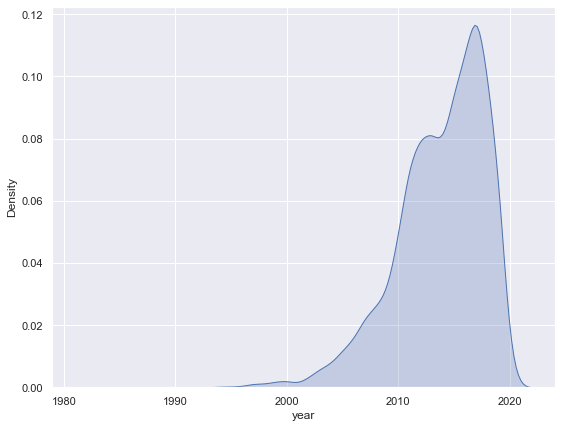

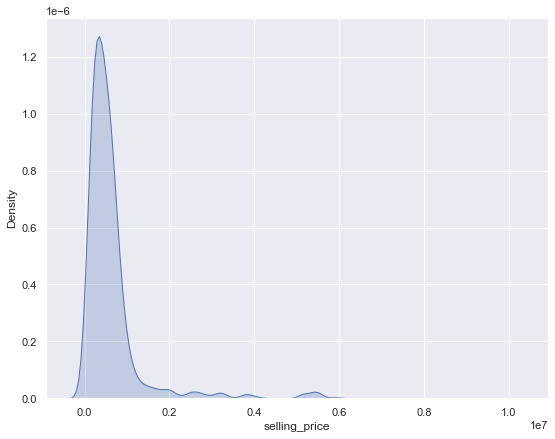

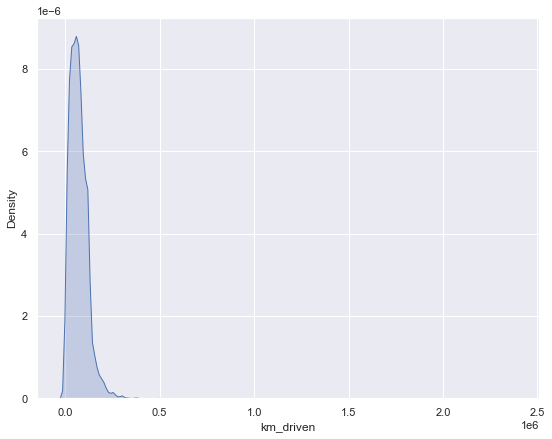

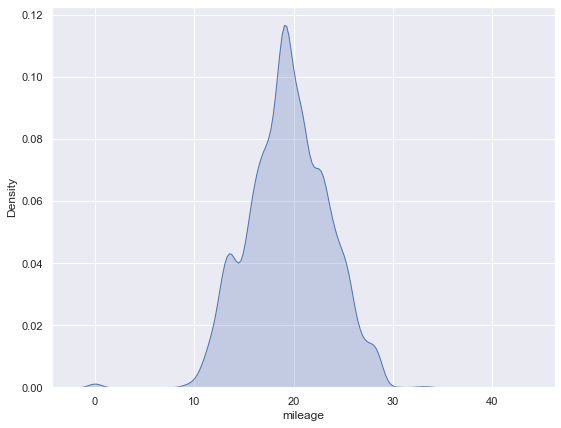

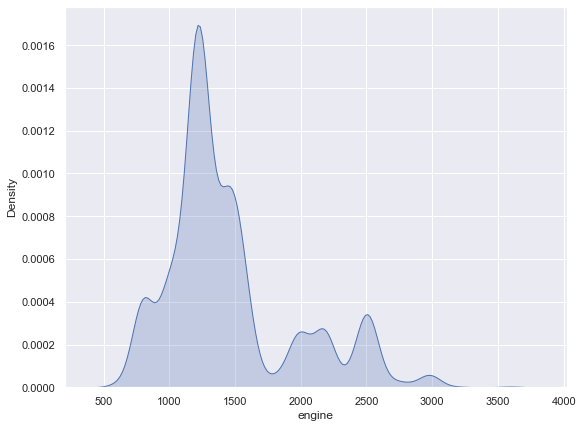

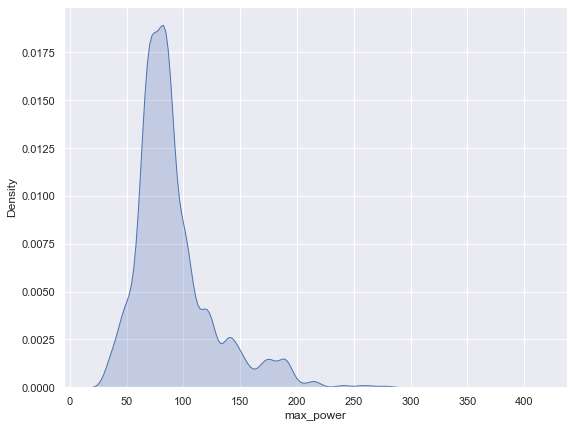

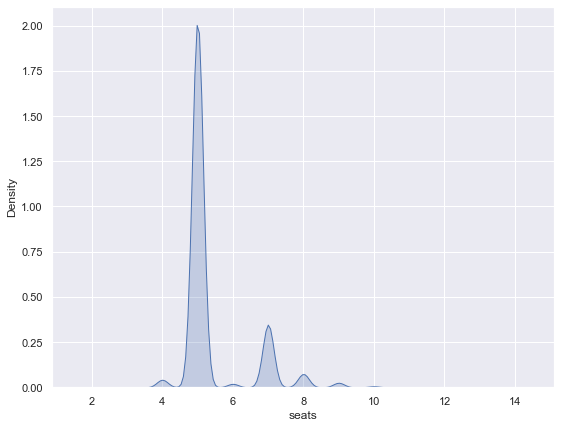

In [43]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

In [44]:
q1_1 = data['year'].quantile(0.99)
q1_2 = data['year'].quantile(0.01)

In [45]:
data = data[data['year'] < q1_1]
data = data[data['year'] > q1_2]

In [46]:
data.shape

(7334, 12)

In [47]:
q2_1 = data['selling_price'].quantile(0.99)
q2_2 = data['selling_price'].quantile(0.01)

In [48]:
data = data[data['selling_price'] < q2_1]
data = data[data['selling_price'] > q2_2]

In [49]:
data.shape

(7155, 12)

In [50]:
q3_1 = data['km_driven'].quantile(0.99)
q3_2 = data['km_driven'].quantile(0.01)

In [51]:
data = data[data['km_driven'] < q3_1]
data = data[data['km_driven'] > q3_2]

In [52]:
data.shape

(7009, 12)

In [53]:
q4_1 = data['mileage'].quantile(0.99)
q4_2 = data['mileage'].quantile(0.01)

In [54]:
data = data[data['mileage'] < q4_1]
data = data[data['mileage'] > q4_2]

In [55]:
data.shape

(6851, 12)

In [56]:
q5_1 = data['engine'].quantile(0.99)
q5_2 = data['engine'].quantile(0.01)

In [57]:
data = data[data['engine'] < q5_1]
data = data[data['engine'] > q5_2]

In [58]:
data.shape

(6411, 12)

In [59]:
q6_1 = data['max_power'].quantile(0.99)
q6_2 = data['max_power'].quantile(0.01)

In [60]:
data = data[data['max_power'] < q6_1]
data = data[data['max_power'] > q6_2]

In [61]:
data.shape

(6271, 12)

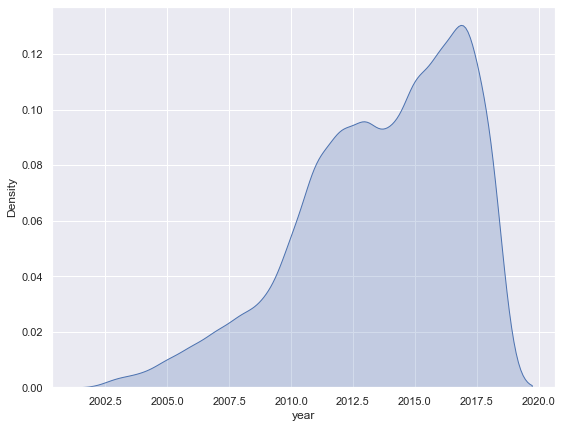

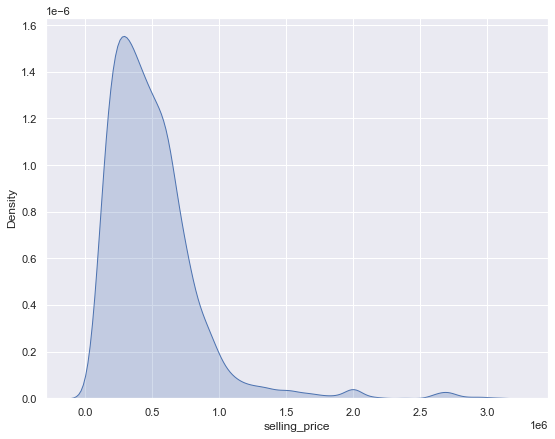

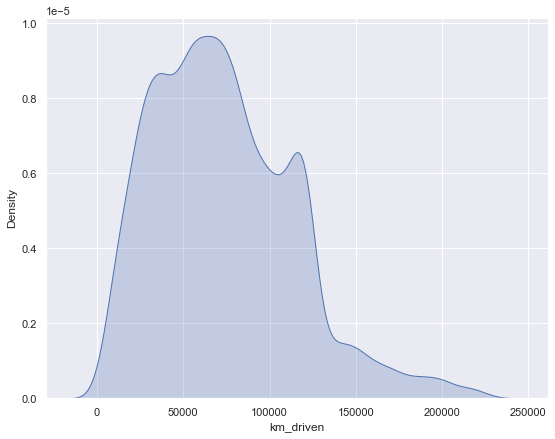

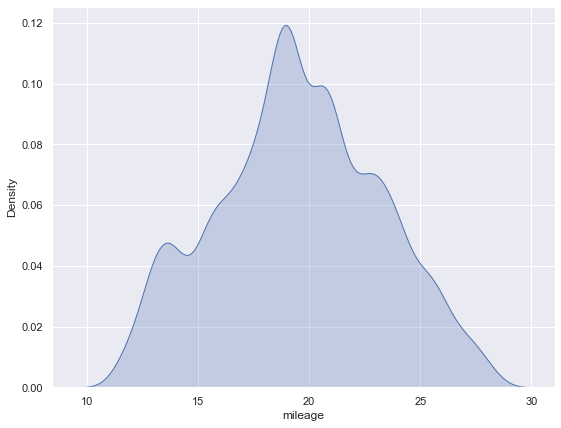

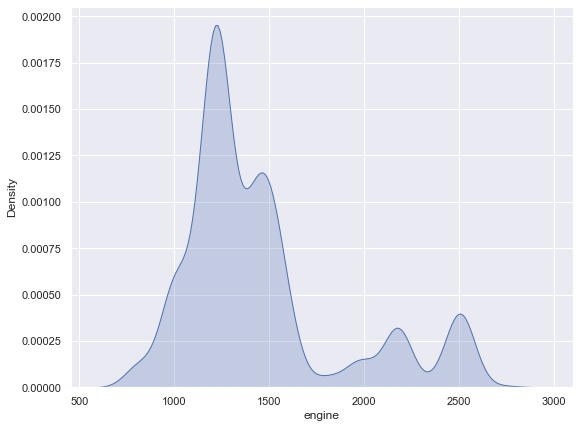

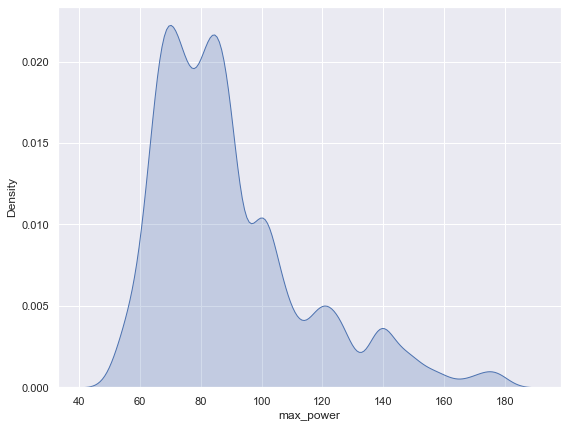

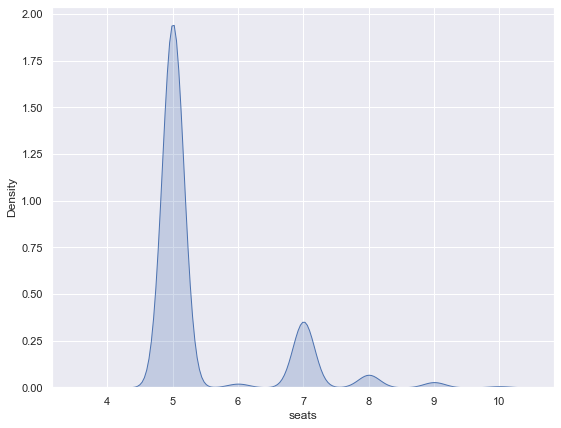

In [62]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

In [63]:
data = data[data['year'] > 2007]

In [64]:
data[data['selling_price'] > 1200000].shape

(227, 12)

In [65]:
data = data[data['selling_price'] < 1200000]

In [66]:
data[data['km_driven'] > 150000].shape

(245, 12)

In [67]:
data = data[data['km_driven'] < 150000]

In [68]:
data[data['engine'] > 2200].shape

(337, 12)

In [69]:
data = data[data['engine'] < 2200]

In [70]:
data[data['max_power'] > 130].shape

(256, 12)

In [71]:
data = data[data['max_power'] < 130]

In [72]:
data.shape

(4810, 12)

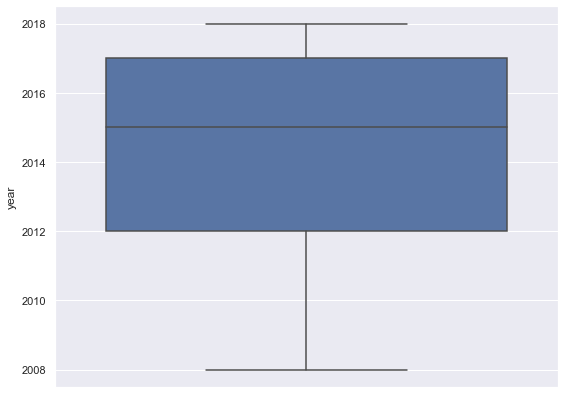

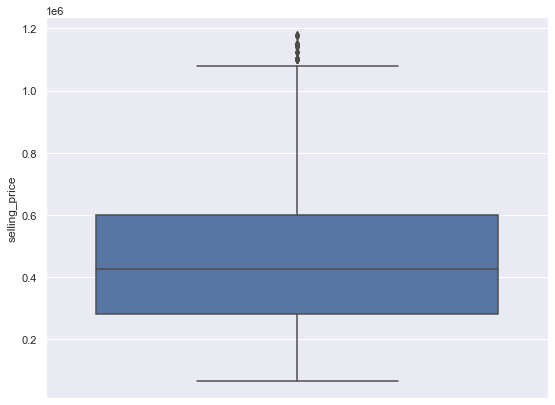

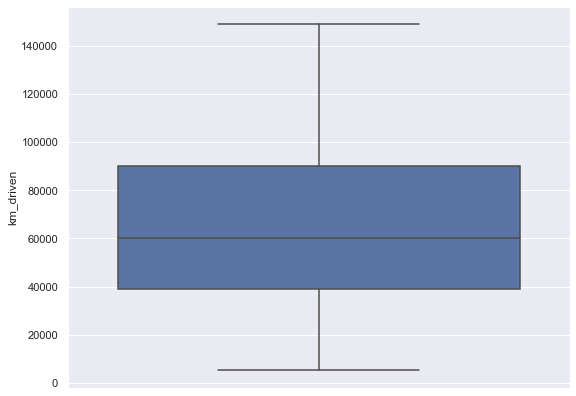

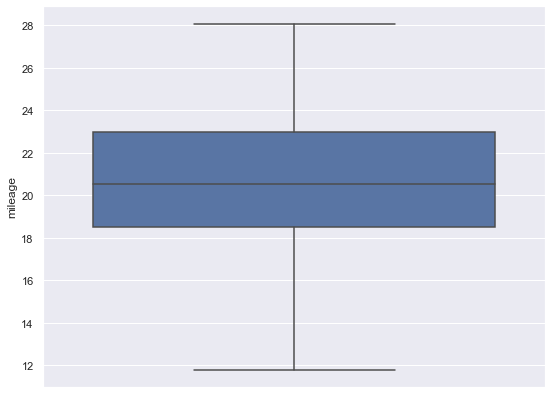

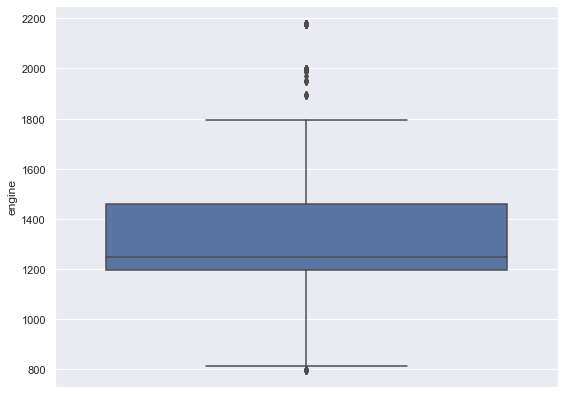

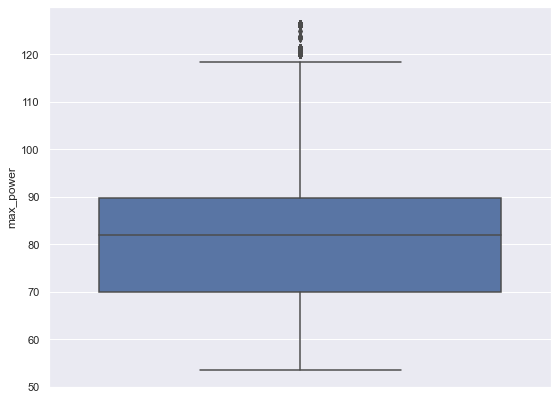

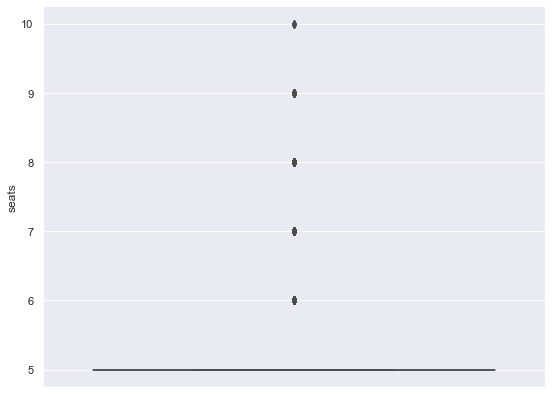

In [73]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = data, y = column)
    plt.show()

In [74]:
data[data['selling_price'] > 1050000].shape

(31, 12)

In [75]:
data = data[data['selling_price'] < 1050000]

In [76]:
data[data['engine'] > 1900].shape

(112, 12)

In [77]:
data = data[data['engine'] < 1900]

In [78]:
data[data['engine'] < 800].shape

(11, 12)

In [79]:
data = data[data['engine'] > 800]

In [80]:
data[data['max_power'] > 118].shape

(161, 12)

In [81]:
data = data[data['max_power'] < 118]

In [82]:
data.shape

(4456, 12)

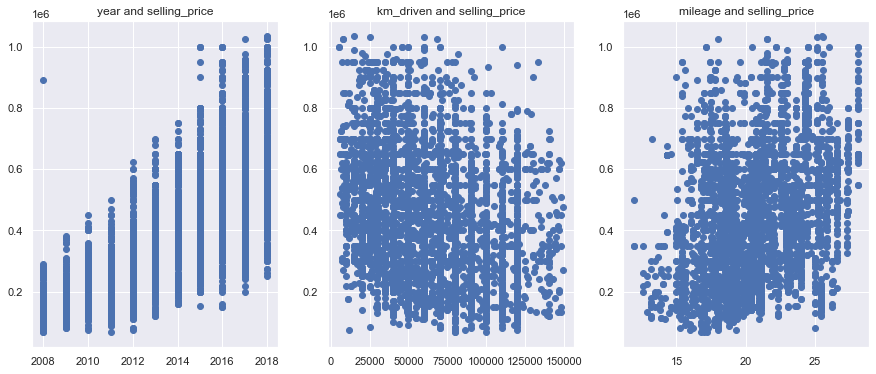

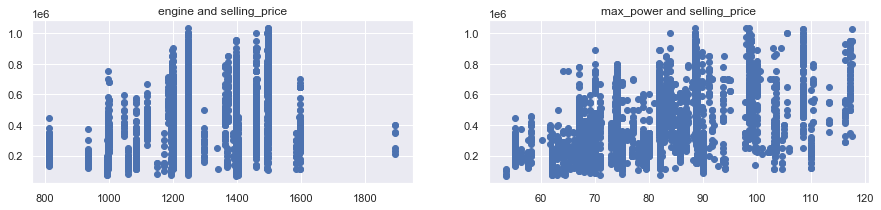

In [88]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = False, figsize = (15, 6))
ax1.scatter(data['year'], data['selling_price'])
ax1.set_title('year and selling_price')

ax2.scatter(data['km_driven'], data['selling_price'])
ax2.set_title('km_driven and selling_price')

ax3.scatter(data['mileage'], data['selling_price'])
ax3.set_title('mileage and selling_price')

fig, (ax4, ax5) = plt.subplots(1, 2, sharey = False, figsize = (15, 3))

ax4.scatter(data['engine'], data['selling_price'])
ax4.set_title('engine and selling_price')

ax5.scatter(data['max_power'], data['selling_price'])
ax5.set_title('max_power and selling_price')

plt.show()

In [87]:
data['log_price'] = np.log(data['selling_price'])

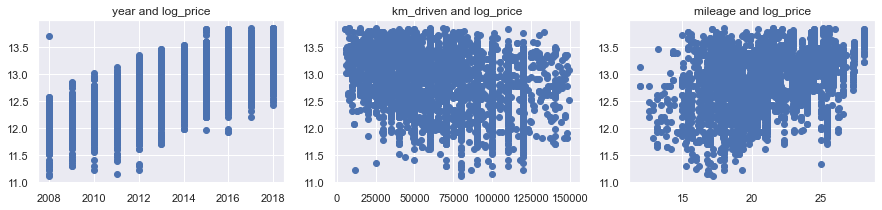

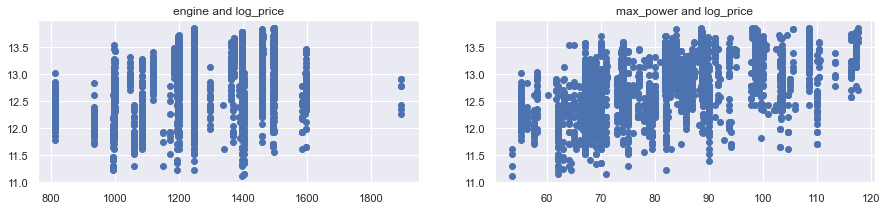

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = False, figsize = (15, 3))
ax1.scatter(data['year'], data['log_price'])
ax1.set_title('year and log_price')

ax2.scatter(data['km_driven'], data['log_price'])
ax2.set_title('km_driven and log_price')

ax3.scatter(data['mileage'], data['log_price'])
ax3.set_title('mileage and log_price')

fig, (ax4, ax5) = plt.subplots(1, 2, sharey = False, figsize = (15, 3))
ax4.scatter(data['engine'], data['log_price'])
ax4.set_title('engine and log_price')

ax5.scatter(data['max_power'], data['log_price'])
ax5.set_title('max_power and log_price')

plt.show()

In [93]:
data2 = data.drop(columns = ['selling_price', 'engine'], axis = 1)
data2.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,max_power,seats,brand,log_price
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,74.00,5.0,Maruti,13.017003
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,103.52,5.0,Skoda,12.821258
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,90.00,5.0,Hyundai,12.323856
5,2017,45000,Petrol,Individual,Manual,First Owner,20.14,81.86,5.0,Hyundai,12.994530
8,2011,90000,Diesel,Individual,Manual,First Owner,23.59,67.10,5.0,Toyota,12.765688


In [94]:
x = data2[['year', 'km_driven', 'mileage', 'max_power', 'seats']]

In [96]:
y = data2['log_price']

In [98]:
x1 = sm.add_constant(x)
sm_model = sm.OLS(y, x1).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2705.
Date:                Sat, 21 Sep 2024   Prob (F-statistic):               0.00
Time:                        00:17:23   Log-Likelihood:                -278.65
No. Observations:                4456   AIC:                             569.3
Df Residuals:                    4450   BIC:                             607.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -219.0820      3.629    -60.368      0.000    -226.197    -211.967
year           0.1141      0.002     62.919      0.000       0.110       0.118
km_driven  -4.907e-07   1.38e-07     -3.560      0.000   -7.61e-07   -2.21e-07
mileage        0.0265      0.001     18.606      0.000       0.024       0.029
max_power      0.0157      0.000     52.240      0.000       0.015       0.016
seats          0.0841      0.007     11.279      0.000       0.069       0.099
==============================================================================
Omnibus:                      154.086   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.606
Skew:                          -0.345   Prob(JB):                     2.78e-49
Kurtosis:                       3.853   Cond. No.                     6.80e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
data2.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,max_power,seats,brand,log_price
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,74.00,5.0,Maruti,13.017003
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,103.52,5.0,Skoda,12.821258
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,90.00,5.0,Hyundai,12.323856
5,2017,45000,Petrol,Individual,Manual,First Owner,20.14,81.86,5.0,Hyundai,12.994530
8,2011,90000,Diesel,Individual,Manual,First Owner,23.59,67.10,5.0,Toyota,12.765688


In [103]:
variables = data2[['year', 'km_driven', 'mileage', 'max_power', 'seats']]
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [104]:
vif

,Features,VIF
0,year,189.934959
1,km_driven,4.806903
2,mileage,48.457958
3,max_power,38.353221
4,seats,96.399456


In [105]:
data3 = pd.get_dummies(data = data2, columns = categorical_columns, drop_first = True, dtype = 'int')

In [106]:
data3.head()

,year,km_driven,mileage,max_power,seats,log_price,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,brand_Honda,brand_Hyundai,brand_Mahindra,brand_Maruti,brand_Nissan,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen
0,2014,145500,23.40,74.00,5.0,13.017003,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,21.14,103.52,5.0,12.821258,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,2010,127000,23.00,90.00,5.0,12.323856,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,2017,45000,20.14,81.86,5.0,12.994530,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
8,2011,90000,23.59,67.10,5.0,12.765688,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [107]:
data3.columns

Index(['year', 'km_driven', 'mileage', 'max_power', 'seats', 'log_price',
       'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Third Owner',
       'brand_Chevrolet', 'brand_Datsun', 'brand_Fiat', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Mahindra', 'brand_Maruti',
       'brand_Nissan', 'brand_Renault', 'brand_Skoda', 'brand_Tata',
       'brand_Toyota', 'brand_Volkswagen'],
      dtype='object')

In [108]:
data3.shape

(4456, 29)

In [109]:
inputs = data3.drop(columns = ['log_price'], axis = 1)
targets = data3['log_price']

In [112]:
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 101, shuffle = True)

In [115]:
X_train.shape

(3564, 28)

In [116]:
X_test.shape

(892, 28)

In [117]:
model1 = LinearRegression()

In [118]:
model1.fit(X_train, y_train)

LinearRegression()

In [120]:
f_regression(X_train, y_train)

(array([4.92593028e+03, 4.10164164e+02, 3.24319182e+02, 1.27696315e+03,
        1.68720179e+02, 1.59002376e+02, 2.26565510e+01, 1.27603235e+02,
        1.49809783e+02, 8.26833881e+00, 1.10721469e+02, 4.55529554e+01,
        2.67687372e+02, 1.27217062e+02, 2.45476380e+02, 9.39753189e+00,
        8.83823913e+00, 3.10835053e+00, 1.31179619e+02, 9.80404449e+00,
        1.97225459e+01, 2.43110042e+01, 1.18071552e-01, 9.46003584e+00,
        1.49928956e+01, 1.70106981e+02, 8.55453100e+00, 2.88016112e+00]),
 array([0.00000000e+000, 2.07723115e-086, 1.83177406e-069, 2.74157584e-239,
        9.99876725e-038, 1.07028441e-035, 2.01400968e-006, 4.25952455e-029,
        9.01455829e-034, 4.05817843e-003, 1.60639120e-025, 1.72732139e-011,
        4.52073247e-058, 5.13981018e-029, 1.48458037e-053, 2.18906525e-003,
        2.96959903e-003, 7.79775411e-002, 7.48648787e-030, 1.75539532e-003,
        9.22574496e-006, 8.57116184e-007, 7.31155813e-001, 2.11590458e-003,
        1.09853447e-004, 5.13809277e-0

In [125]:
p_values = f_regression(X_train, y_train)[1].round(3)[:5]

In [127]:
df_p = pd.DataFrame()
df_p['Features'] = inputs.columns[:5]
df_p['p_values'] = p_values
df_p

,Features,p_values
0,year,0.0
1,km_driven,0.0
2,mileage,0.0
3,max_power,0.0
4,seats,0.0


In [128]:
yhat1 = model1.predict(X_train)

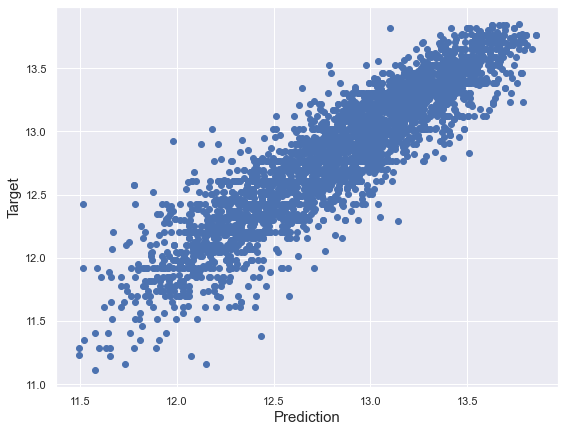

In [131]:
plt.figure(figsize = (9, 7))
plt.scatter(yhat1, y_train)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.show()

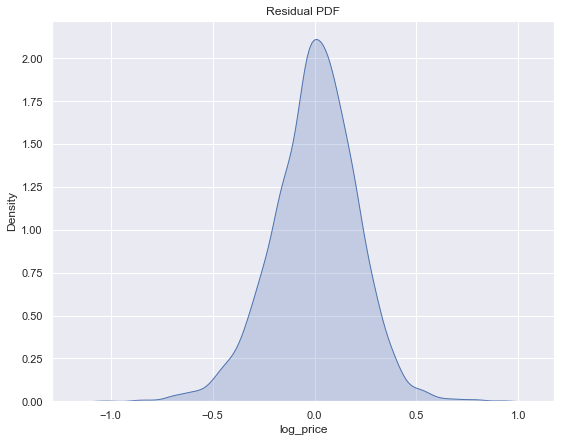

In [132]:
plt.figure(figsize = (9, 7))
sns.kdeplot(y_train - yhat1, shade = True)
plt.title('Residual PDF')
plt.show()

In [133]:
model1.score(X_train, y_train)

0.8350195477543524

In [134]:
model1.intercept_

12.871644094845957

In [135]:
model1.coef_

array([ 0.32346244, -0.04047368, -0.01972993,  0.17408412,  0.03123189,
        0.16097676,  0.01593934,  0.02942643, -0.00140666, -0.00885728,
       -0.01078623, -0.01059659, -0.0302925 , -0.02685116, -0.3282759 ,
       -0.1653175 , -0.15553827, -0.38576685, -0.35924227, -0.58908613,
       -0.30024185, -0.64351383, -0.18322931, -0.25889   , -0.19643989,
       -0.50788744, -0.20383521, -0.27546777])

In [136]:
r2 = model1.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.8337127718949809

In [139]:
model1_summary = pd.DataFrame(data = inputs.columns, columns = ['Features'])
model1_summary['Coefficient'] = model1.coef_

In [140]:
model1_summary

,Features,Coefficient
0,year,0.323462
1,km_driven,-0.040474
2,mileage,-0.019730
3,max_power,0.174084
4,seats,0.031232
5,fuel_Diesel,0.160977
6,fuel_LPG,0.015939
7,fuel_Petrol,0.029426
8,seller_type_Individual,-0.001407
9,seller_type_Trustmark Dealer,-0.008857


In [142]:
yhat_test1 = model1.predict(X_test)

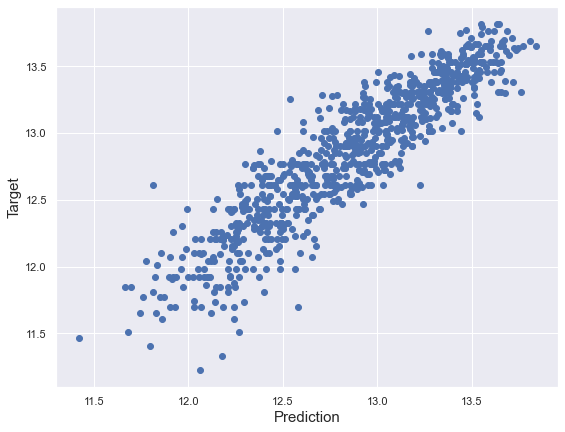

In [144]:
plt.figure(figsize = (9, 7))
plt.scatter(yhat_test1, y_test)
plt.xlabel('Prediction', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.show()

In [145]:
y_test.head()

3892    11.225243
3867    12.429216
4730    12.611538
570     13.353475
5831    12.611538
Name: log_price, dtype: float64

In [146]:
y_test_re = y_test.reset_index(drop = True)

In [147]:
y_test_re.head()

0    11.225243
1    12.429216
2    12.611538
3    13.353475
4    12.611538
Name: log_price, dtype: float64

In [150]:
df_performance = pd.DataFrame()
df_performance['Target'] = np.exp(y_test_re)
df_performance['Prediction'] = np.exp(yhat_test1)
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']
df_performance['Percent Error'] = np.absolute(df_performance['Residual'] / df_performance['Target'] * 100)
df_performance

,Target,Prediction,Residual,Percent Error
0,75000.0,173450.825481,-98450.825481,131.267767
1,250000.0,292292.894035,-42292.894035,16.917158
2,300000.0,428417.974961,-128417.974961,42.805992
3,630000.0,470596.111909,159403.888091,25.302204
4,300000.0,349401.710193,-49401.710193,16.467237
...,...,...,...,...
887,380000.0,353415.210113,26584.789887,6.995997
888,480000.0,459315.384720,20684.615280,4.309295
889,819999.0,619016.204609,200982.795391,24.510127
890,412000.0,471963.920268,-59963.920268,14.554350


In [151]:
df_performance.describe()

,Target,Prediction,Residual,Percent Error
count,892.000000,8.920000e+02,892.000000,892.000000
mean,436408.031390,4.314347e+05,4973.380876,16.650907
std,205379.828969,1.914252e+05,85049.045408,15.640711
min,75000.000000,9.126007e+04,-347245.369090,0.050095
25%,270000.000000,2.672031e+05,-47173.255884,5.807342
50%,400000.000000,4.057648e+05,1067.240762,13.095157
75%,600000.000000,5.800128e+05,52472.225899,22.751645
max,1000000.000000,1.021801e+06,373057.040995,142.765402


In [152]:
model1.score(X_test, y_test)

0.8391994851316698

In [153]:
r2_t = model1.score(X_test, y_test)
n_t = X_test.shape[0]
p_t = X_test.shape[1]
adjusted_r2_t = 1 - (1 - r2_t) * (n_t - 1) / (n_t - p_t - 1)
adjusted_r2_t

0.8339823189482245